# Móduilo 25: Introducción a Machine Learning 1
- Introducción básica a ML
- Análsis de gráficas de correlación
- Validacion de tipos de variable
- Eliminación de variables con alta correlación
- Análisis univariado y bivariado
- Conceptos de Training y Testing

## Órden típico de un modelo de ML
- *Siempre validar si será un aprendizaje supervisado o no supervisado*
    - Supervisado: análisis que se aplica a un set de datos que buscan la respuesta a una pregunta utilizando valores que ya fueron etiquetados: bueno/manlo, 1/0, un rango de números, etc. Como modelos de regresión
    - No supervisado: análisis que se aplica a un set de datos que NO fueron etiquetados previamente. Por ejemplo: clustering de clientes

### Parte 1 - Preparación:
- Hacer EDA
- Análisis univariado
- Análisis bivariado - Correlación
- Field Engineering - Dado lo que ví en los pasos anteriores, mejorar los campos (columnas). Entre otras cosas, esto puede incluir la eliminación de columnas
- Definir % de training y testing
- Definir, preeliminarmente, los modelos que se van a ejecutar para entender la data
- Split de la data (70% training - 30% testing usualmente)

### Parte 2 - Ejecución:
- Imputación de datos
- Balance de Clases
- Ejecutar Modelo
- Matriz de confusión
- Validar precisión de indicadores por modelo

# The excercise
For this excercise we want to predict the "Response" Column

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('marketing_campaign.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [80]:
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
2161,902,1980,Graduation,Together,62994.0,1,0,2014-03-04,74,224,...,6,0,0,0,0,0,0,3,11,0
395,3428,1991,PhD,Together,68682.0,0,0,2013-10-06,56,919,...,2,0,0,0,0,0,0,3,11,0
2113,3969,1974,Master,Together,43018.0,0,1,2013-11-01,46,35,...,5,0,0,0,0,0,0,3,11,0
1496,6885,1977,Graduation,Divorced,32952.0,1,0,2013-12-01,36,38,...,7,0,0,0,0,0,0,3,11,0
711,1272,1965,Master,Single,55250.0,0,1,2012-10-21,49,664,...,5,0,0,0,0,0,0,3,11,0
95,7516,1983,Graduation,Married,30096.0,1,0,2014-05-22,30,5,...,6,0,0,0,0,0,0,3,11,0
1781,5283,1976,PhD,Single,42473.0,1,1,2014-02-17,72,93,...,5,0,0,0,0,0,0,3,11,0
1689,295,1989,Graduation,Single,81217.0,0,0,2013-07-19,77,493,...,1,0,0,0,0,0,0,3,11,0
1528,830,1987,PhD,Single,74004.0,0,0,2014-02-24,5,784,...,3,0,0,1,1,0,0,3,11,1


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [82]:
# Validar la cantidad de celdas que son nulas
print(f'Existen {df.isnull().sum().sum()} valores no definidos')

Existen 24 valores no definidos


In [83]:
# Valores nulos por columna
df.isnull().sum()
# Una vez que vimos cuántos y dónde están los valores faltantes, hay que ver qué se puede hacer con ellos

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [84]:
# Número de valores únicos por columna
df.nunique().sort_values()

Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp2              2
Complain                  2
AcceptedCmp1              2
AcceptedCmp5              2
Kidhome                   3
Teenhome                  3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1974
ID                     2240
dtype: int64

### Insights
- Las columnas Z_Revenue, Z_CostContact parecen no aportar nada puesto que solamente tienen un solo valor para todas las rows
- Se debe imputar un valor a las celdas income del dataset que tienen NaN como valor. Se debería preguntar al negocio si esta variable es crucial ya que tal vez podrían eliminarse
- Se asume, para el caso, que se puede imputar el promedio total de income del dataset

## Visualización Básica

C:\Users\USER\AppData\Local\Temp\ipykernel_19956\681163632.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr(method='pearson')


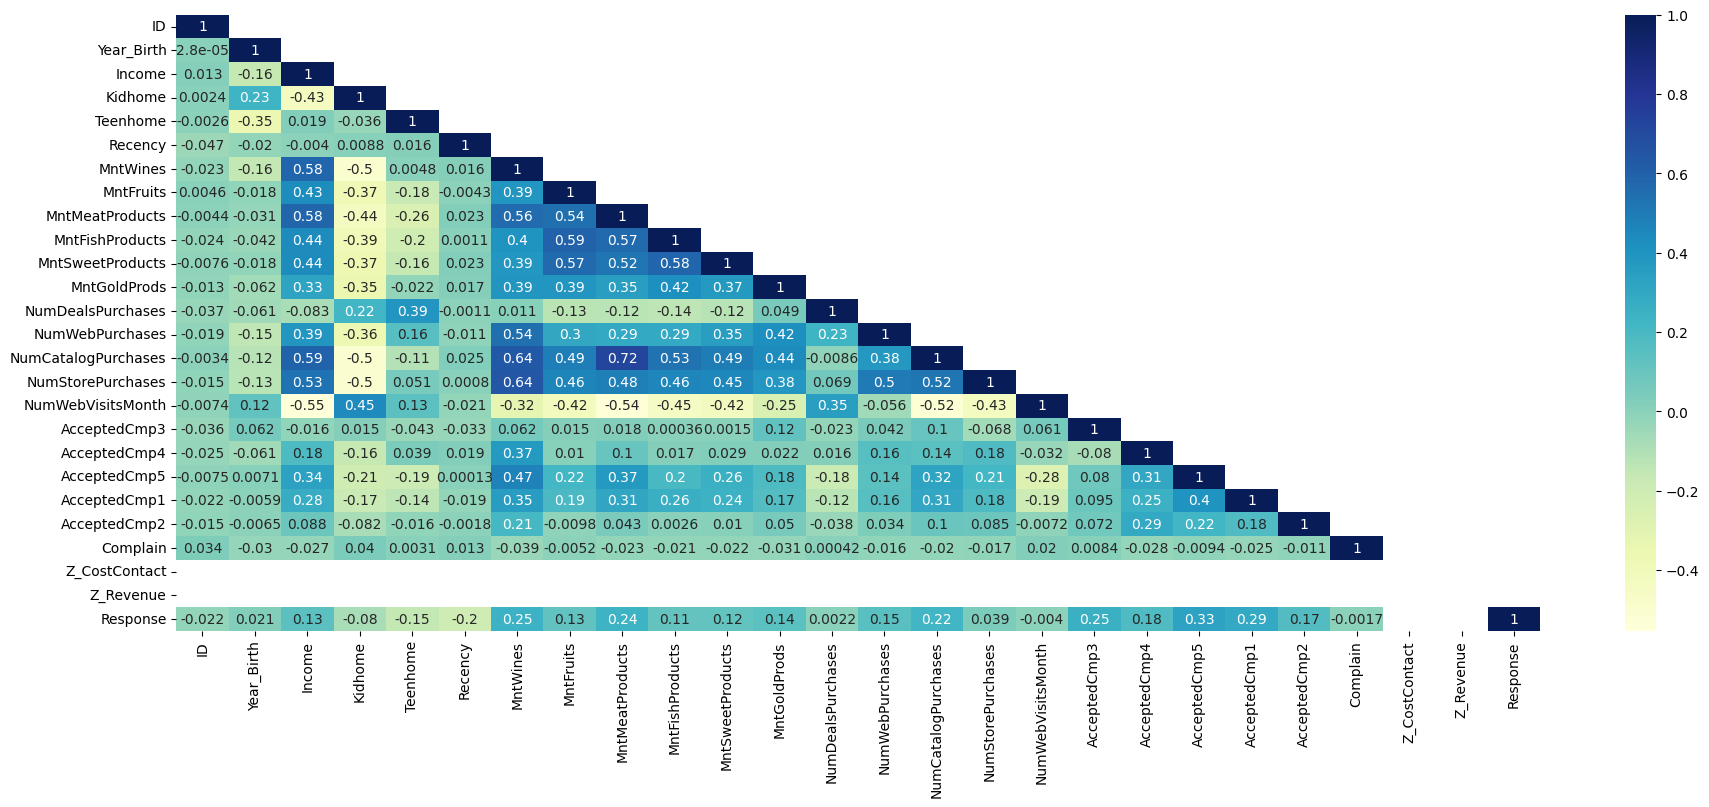

In [85]:
# Gráfica de correlación - Se hace para ver posiblidades de disminuir variables que tienen una correlación muy alta entre ellas puesto que esto denota multicolinealidad (generalmente tiene que tener aprox 0.9)
plt.figure(figsize=(22,8))
corr_df = df.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap='YlGnBu', annot=True)

In [86]:
# Visualiza las columnas y luyego seleccional las columnas numéricas
print('Lista compelta de columnas')
print(df.columns)
print(len(df.columns), ' columns')

# Numerical columns
cols_num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
            'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

Lista compelta de columnas
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
29  columns


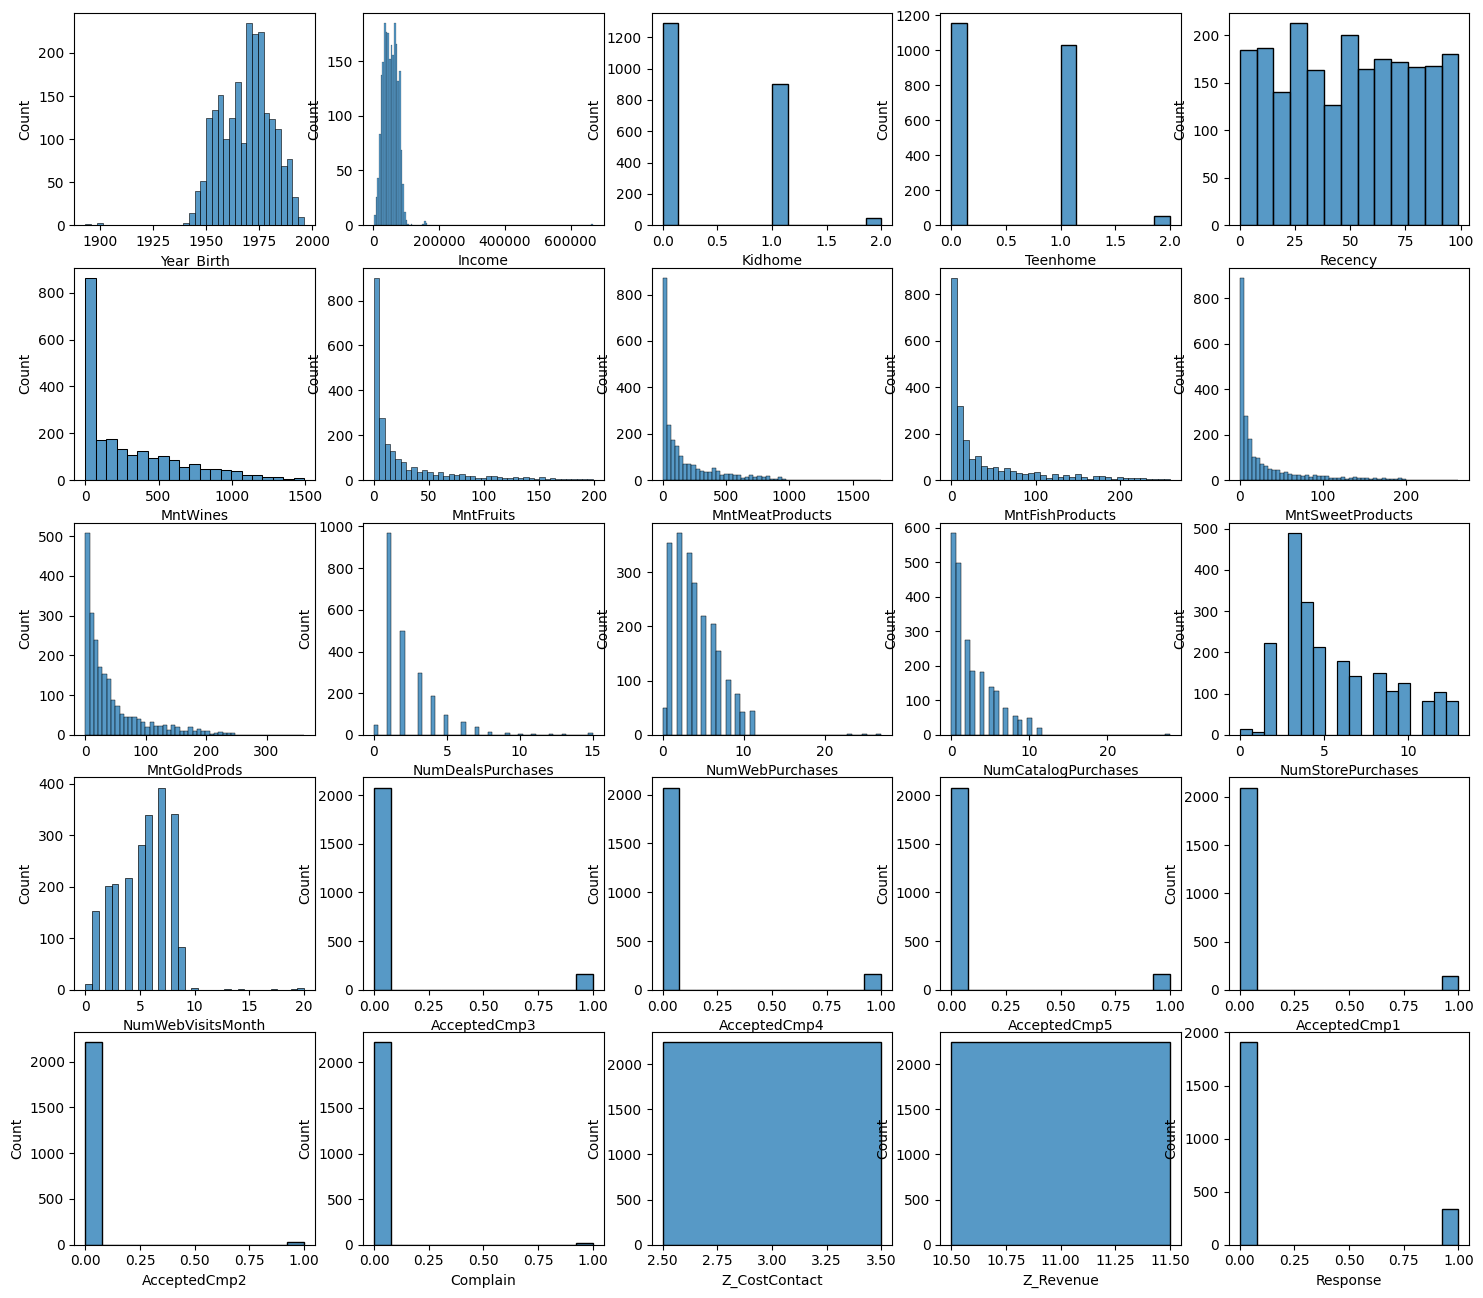

In [87]:
# Gráfica Exploratoria de todas las columnas (25)
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(18,16))
for i, column in enumerate(cols_num):
    sns.histplot(df[column], ax=ax[i//5, i%5], kde=False)

## Consejos para modelos
- En casos donde la distribución de la variable a estudiar presenta algún tipo de sesgo (como en este caso las primeras 10 variables), es común que se aplique una transformación logarítmica. (investigar más al respecto para ver en qué casos). Esto no afecta la información en sí, pero ayuda a que el modelo aprenda más rápdio
- Otra cosa que hay que tomar en cuenta es las escalas de las variables, mientras que en algunas variables el rango puede ser muy corto (en este caso 100 años en el año de nacimiento o 200 en MntFruits), hay otras variables que tendrán rangos mucho mayores (como Income que tiene 600,000). Para esto, muchas veces se iguala el rango mediante transformaciones matemáticas. Igualmente no altera la información como tal pero ayuda al desempeño del modelo.

## Insights
- Los campos MntWines, MntFruits, Mnt en general tienen un sesgo importante hacia la derecha. Para los modelso de ML eso no ayuda en el proceso por lo que deberíamos generar campos adicionales con su logaritmo natoral que permiten una figura menos sesgada
- Así mismo, la clase de respuyesta final (Response), se ve desbalanceada (imbalanced class) Ref: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

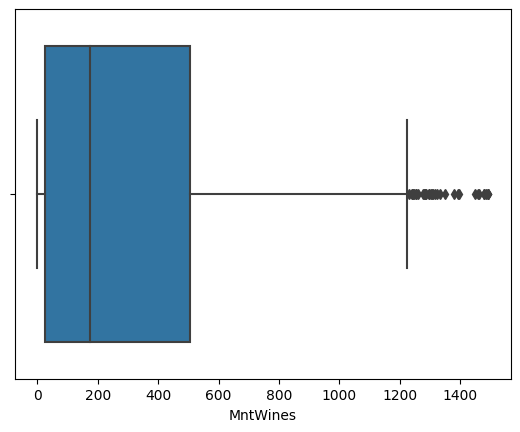

In [88]:
# Se buscan outliers con gráficos box-plot
ax = sns.boxplot(x=df['MntWines'])

# En este ejemplo en particular no se ven valores tan alejados de los límites

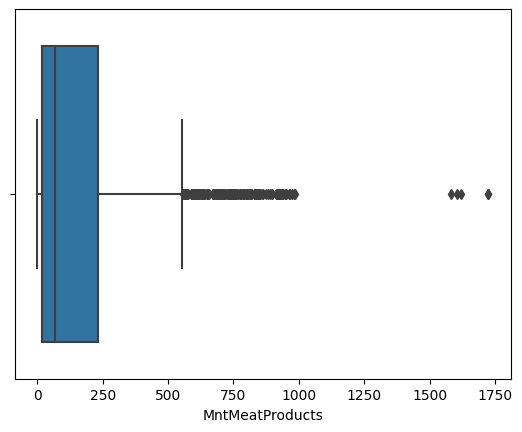

In [89]:
# En cambio para el gráfico de Meat Products se puede ver con mucha claridad la presetncia de outliers lo que confirma el alto sesgo de la vartiable
ax = sns.boxplot(x=df['MntMeatProducts'])

# Para esos 4 outliers que se ven sumamente diferentes del resto, habría que revisar qué se debe hacer con ellos

## Insights de la Correlación
- También se puede hacer un análisis de correlación para validar variables que tengan datos no compatibles
- Para encontrar variables uqe tengan relaciones muy altas unas con otras (>.9) lo que las hace sospechosas de que vayan a producir multicolinealidad
- En este caso no se encontró ninguna variable que deba ser eliminada por alto correlación puesto que las variables con mayor correlación fueron NumCatalogPurchases y MntMeatProducts con una correlación de 0.7
---

## Análisis Bivariado

In [90]:
# Se muestran los diferentes valores de las variables según el Estado Civil
# Una de las variables interesantes a analizar es el estado civil
df.groupby(['Marital_Status']).mean(numeric_only=True).T

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
ID,6051.5,2728.333333,5427.060345,5633.152778,5489.241667,5644.674138,5969.558442,5812.5
Year_Birth,1975.0,1973.000000,1966.275862,1969.579861,1971.489583,1967.746552,1958.558442,1973.0
Income,72365.5,43789.000000,52834.228448,51724.978996,50995.350318,53245.534031,56481.552632,48432.0
Kidhome,0.0,1.000000,0.413793,0.456019,0.464583,0.450000,0.233766,0.0
Teenhome,0.0,0.666667,0.590517,0.511574,0.406250,0.529310,0.636364,1.0
Recency,53.0,30.333333,49.487069,48.277778,49.506250,50.106897,49.142857,3.0
MntWines,355.5,184.666667,324.844828,299.480324,288.331250,306.825862,369.272727,322.0
MntFruits,84.5,4.000000,27.426724,25.734954,26.835417,25.350000,33.090909,3.0
MntMeatProducts,312.5,26.333333,150.206897,160.681713,182.108333,168.103448,189.285714,50.0
MntFishProducts,205.5,7.666667,35.043103,35.380787,38.216667,38.991379,51.389610,4.0


In [91]:
df.groupby(['Response']).mean(numeric_only=True).T

Response,0,1
ID,5622.009444,5421.820359
Year_Birth,1968.698846,1969.416168
Income,50839.132767,60209.675676
Kidhome,0.462225,0.341317
Teenhome,0.541448,0.305389
Recency,51.514690,35.383234
MntWines,269.104407,502.703593
MntFruits,24.216684,38.203593
MntMeatProducts,144.624344,294.353293
MntFishProducts,34.980063,52.050898


## Field Engineering
- Se refiere a los distintos pasos que se deben tomar para dejar más limpio y preparado el dataset para el modelo
- Eliminar las columnas con un solo valor (como Z_Costcontact)
- Eliminar las líneas con nulos
- Cambiar el tipo de dato de la columna Education y Marital_Status

In [92]:
# Antes de eliminar o modificar el dataframe es necesario decidir si es que se guardara en el DF original
# En este caso se ha decidido que se va a reemplazar el df original y no se hará una copia del mismo

df.drop(columns=['Z_Revenue', 'Z_CostContact'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [93]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
253,2227,1958,2n Cycle,Together,26490.0,0,0,2012-09-22,92,45,...,1,5,6,0,0,0,0,0,0,0
351,175,1986,Graduation,Married,71952.0,1,0,2013-01-10,93,656,...,4,8,4,1,0,1,0,0,0,0
855,1456,1979,Graduation,Single,60474.0,0,1,2013-04-01,25,265,...,2,12,7,0,0,0,0,0,0,0
1239,286,1952,Graduation,Single,44213.0,1,1,2013-11-29,48,95,...,1,5,6,0,0,0,0,0,0,0
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,...,7,10,3,1,0,0,1,0,0,1


In [94]:
# Validación de Nulos
df.loc[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,0


In [95]:
# Los valores de income nulos serán llenados con el promeido general de income

avg_income = df['Income'].mean()

df = df.replace(np.nan, avg_income)

In [96]:
# Validar que no existen más nulos después del reemplazo
df.loc[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


In [97]:
# Validar cuántas celdas en total son nulas
print(f'Existen {df.isnull().sum().sum()} celdas en null')

Existen 0 celdas en null


### Cambio de Columnas a Categorías

In [98]:
# Muestra los valores únicos en Educación y Estado Civil
print(df['Education'].unique())
print(df['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [99]:
df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   category
 3   Marital_Status       2240 non-null   category
 4   Income               2240 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

---
## Preparación Final antes del Split
- Eliminar columnas con alta correlación
- Generar clases para imbalances internos
- Eliminar el ID (no es relevante en la predicción)

In [101]:
# Generar una copia del df
df2 = df.copy()
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [102]:
# Eliminar columnas innecesarias
# id, Dt_Customer
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

In [103]:
# Generar variables transformadas logarítmicamente para variables con alto sesgo
df2['MntWines-log'] = np.log(df2['MntWines']+1)
df2['MntFruits-log'] = np.log(df2['MntFruits']+1)
df2['MntMeatProducts-log'] = np.log(df2['MntMeatProducts']+1)
df2['MntFishProducts-log'] = np.log(df2['MntFishProducts']+1)
df2['MntSweetProducts-log'] = np.log(df2['MntSweetProducts']+1)
df2['NumDealsPurchases-log'] = np.log(df2['NumDealsPurchases']+1)
df2['NumWebPurchases-log'] = np.log(df2['NumWebPurchases']+1)
df2['NumCatalogPurchases-log'] = np.log(df2['NumCatalogPurchases']+1)

# Se usa +1 para evitar errores de log(0)

In [104]:
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,MntWines-log,MntFruits-log,MntMeatProducts-log,MntFishProducts-log,MntSweetProducts-log,NumDealsPurchases-log,NumWebPurchases-log,NumCatalogPurchases-log
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,1,6.455199,4.488636,6.304449,5.153292,4.488636,1.386294,2.197225,2.397895
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,2.484907,0.693147,1.945910,1.098612,0.693147,1.098612,0.693147,0.693147
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,6.056784,3.912023,4.852030,4.718499,3.091042,0.693147,2.197225,1.098612
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,2.484907,1.609438,3.044522,2.397895,1.386294,1.098612,1.098612,0.000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,5.159055,3.784190,4.779123,3.850148,3.332205,1.791759,1.791759,1.386294


### Pasos mas comunes
- Revisar y tratar Clases desbalanceados
- Asignación de meses a números (Pasar Ene -> 1, Dec -> 12)
- Imputación de datos (Imputer) - Ya se hizo, fue cuando pusimos el promedio de todos los Income a los Income que salían como null
- Cambiar columnas Yes - No o True - False a 1 y 0
- Las categorías como Marital Status y Education también se pueden pasar a número
- Generar campostipo categoría

In [105]:
cols_num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
            'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
            'MntWines-log',	'MntFruits-log', 'MntMeatProducts-log',	'MntFishProducts-log',	'MntSweetProducts-log', 'NumDealsPurchases-log', 'NumWebPurchases-log',	'NumCatalogPurchases-log']

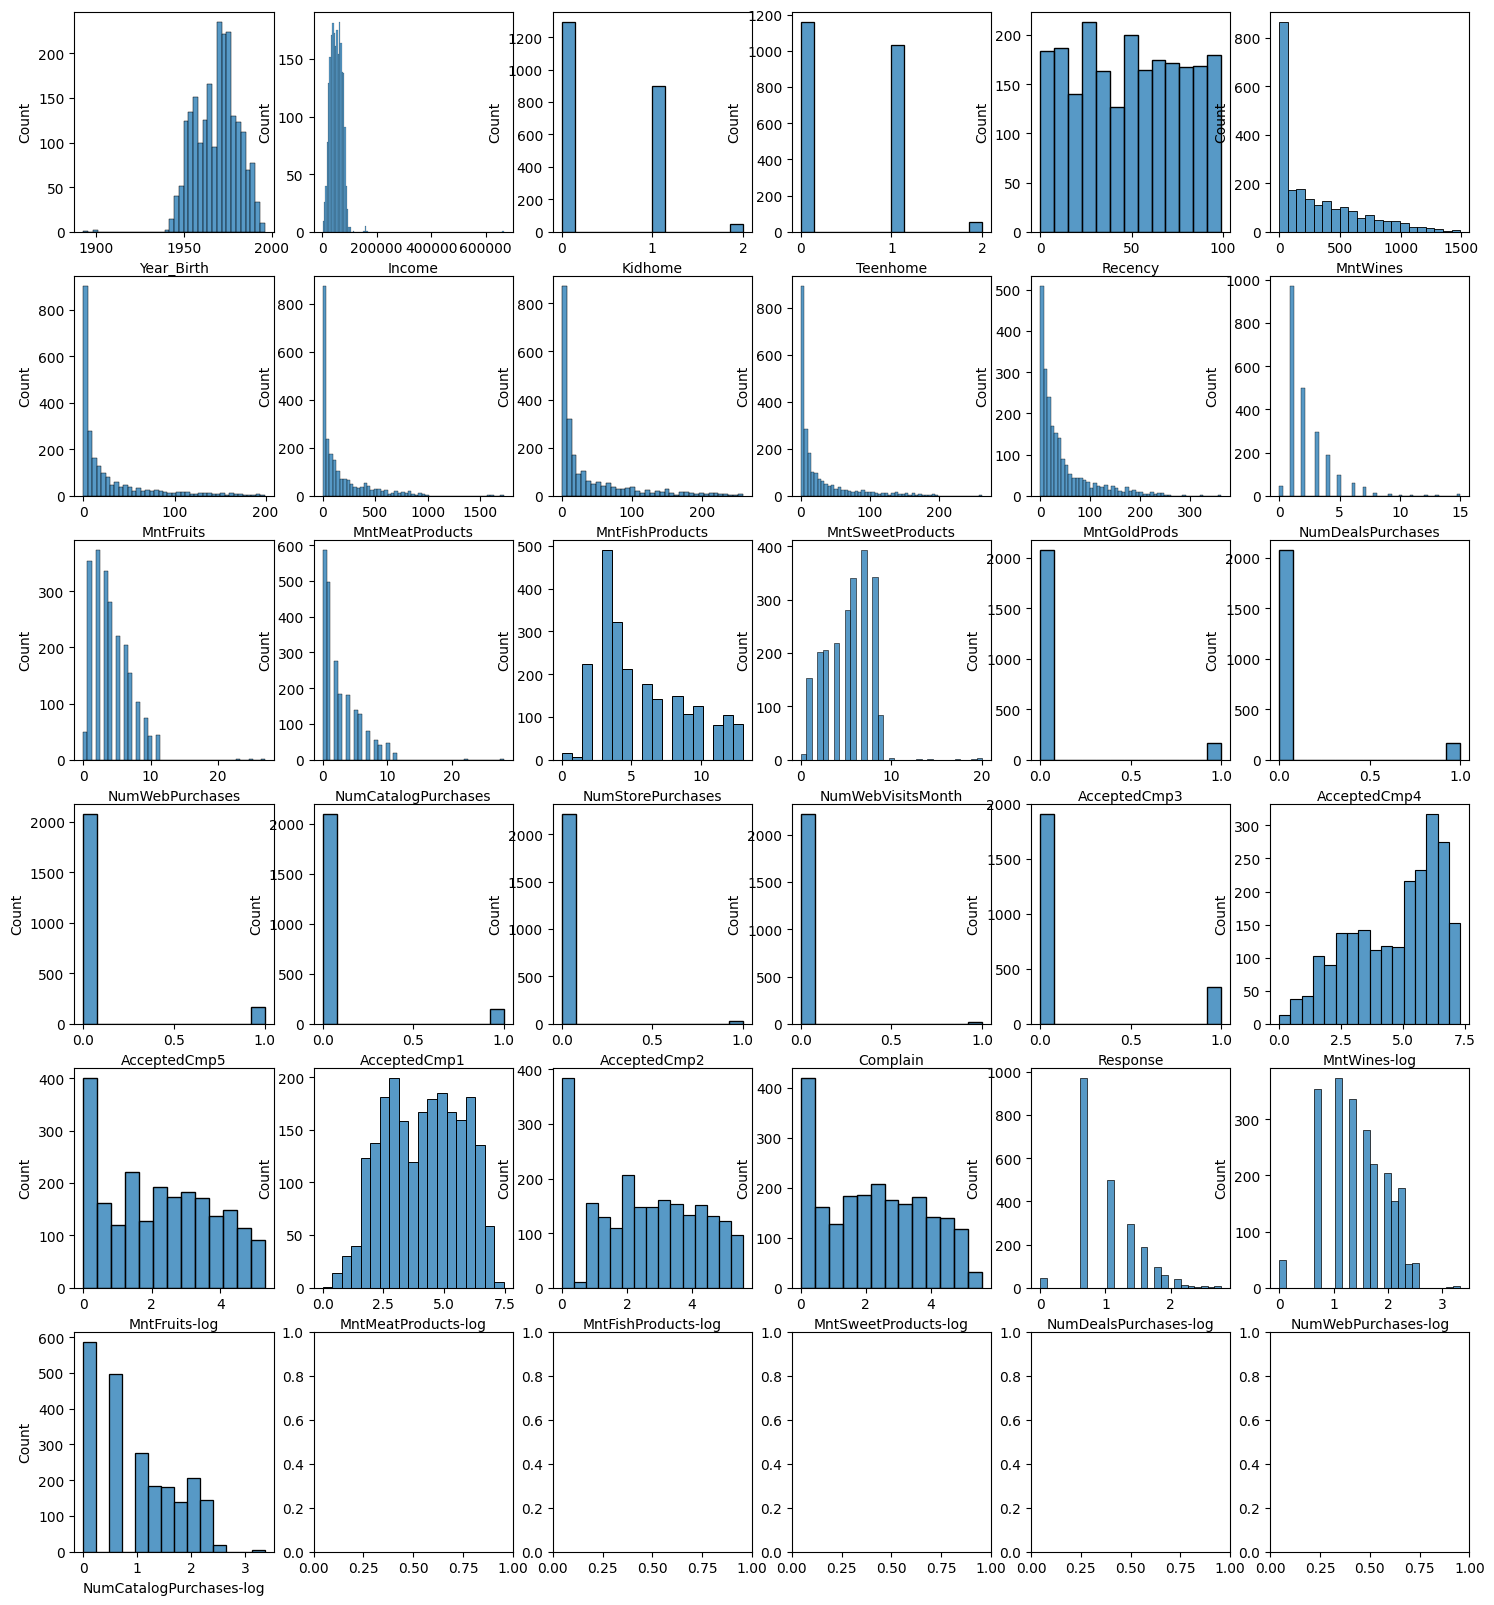

In [106]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(18,20))
for i, column in enumerate(cols_num):
    sns.histplot(df2[column], ax = axes[i//6,i%6], kde=False)

### Insights
- Se muestra nuevamente el gráfico de variables numéricas
- Ahora con los logs, transfomracions y admeás cambios de datos
- Se puede ver cómo las variables tipo log traen mucha más información
- **Muy importante** definir si es qeu se van a dejar las variables en el dataset trabajado (df2) o eliminar
---

### Data Split
- Rompiendo el dataset en 70% - 30%
- Los modelos de ML generalmente se rompen en dos sets, el mayor (70%) para entrenamiento del modelo y el menor (30% para el testing del modelo)
- Este tgeneralmente es el paso final con el Científico de Datos

In [107]:
# Librería de Split
from sklearn.model_selection import train_test_split

x = df2.drop(columns=['Response'])    # El aarray x (atributos) no va a contener la respuesta (num columnas x m)
y = df2['Response']         # Clase a predecir
# Se difice a X y Y en un ratio 70:30

# Convert categorical variables to dummy variables
#  This will generate 467 additional columns

# x = pd.get_dummies(x, drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [108]:
x_train.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,MntWines-log,MntFruits-log,MntMeatProducts-log,MntFishProducts-log,MntSweetProducts-log,NumDealsPurchases-log,NumWebPurchases-log,NumCatalogPurchases-log
1747,7881,1946,Master,Married,66835.0,0,0,2013-09-28,21,620,...,0,0,6.431331,3.295837,5.278115,3.555348,2.890372,0.693147,1.945910,1.609438
115,2286,1962,Graduation,Single,50785.0,1,1,2013-09-10,27,64,...,0,0,4.174387,0.693147,3.091042,0.000000,0.693147,1.098612,1.098612,0.693147
1739,1064,1971,PhD,Married,42403.0,1,0,2013-12-11,18,22,...,0,0,3.135494,0.693147,2.484907,0.000000,1.791759,0.693147,0.693147,0.000000


In [120]:
# Validación de la estructura de los datasets
# En este caso la variable "Response" iene 15/85 en cuanto a 1/0 y debería mantenerse esta proporción del dataset original en los datasets de training y testing
# Esa es justamente la idea de hacer el split

print("Original Personal Loan True Values   : {0} ({1:0.2f}%)".format(len(df2.loc[df2['Response'] == 1]), (len(df2.loc[df2['Response'] == 1])/len(df2.index)) * 100 ))
print("Original Personal Loan False Values  : {0} ({1:0.2f}%)\n".format(len(df2.loc[df2['Response'] == 0]), (len(df2.loc[df2['Response'] == 0])/len(df2.index)) * 100 ))

print("Training Personal Loan True Values   : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train[:] == 1]), (len(y_train.loc[y_train[:] == 1])/len(y_train.index)) * 100 ))
print("Training Personal Loan False Values  : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train[:] == 0]), (len(y_train.loc[y_train[:] == 0])/len(y_train.index)) * 100 ))
print('The Training dataset contains {0:0.2f}% of the registers in the original dataset\n'.format( len(y_train[:]) / len(df2['Response']) * 100))

print("Testing Personal Loan True Values   : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test[:] == 1]), (len(y_test.loc[y_test[:] == 1])/len(y_test.index)) * 100 ))
print("Testing Personal Loan False Values  : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test[:] == 0]), (len(y_test.loc[y_test[:] == 0])/len(y_test.index)) * 100 ))
print('The Testing dataset contains {0:0.2f}% of the registers in the original dataset\n'.format( len(y_test[:]) / len(df2['Response']) * 100))

Original Personal Loan True Values   : 334 (14.91%)
Original Personal Loan False Values  : 1906 (85.09%)

Training Personal Loan True Values   : 226 (14.41%)
Training Personal Loan False Values  : 1342 (85.59%)
The Training dataset contains 70.00% of the registers in the original dataset

Testing Personal Loan True Values   : 108 (16.07%)
Testing Personal Loan False Values  : 564 (83.93%)
The Testing dataset contains 30.00% of the registers in the original dataset

